<a href="https://colab.research.google.com/github/mkbahk/AmazonBraket/blob/main/Qiskit_HelloWorld_with_LocalAerSimulator_No_primitives_mkbahk_20241015.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install qiskit[visualization]=='1.2.4'
#%pip install qiskit_ibm_runtime=='0.30.0'
%pip install qiskit_aer=='0.15.1'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 52.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 51.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 8.2 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=8ae5af27e526aab47251b7a27ff541eb71c6757b375ca1766b4899d8451e60b9
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 86.2 MB/s eta 0:00:00


In [2]:
%pip show qiskit qiskit_aer

Name: qiskit
Version: 1.2.4
Summary: An open-source SDK for working with quantum computers at the level of extended quantum circuits, operators, and primitives.
Home-page: https://www.ibm.com/quantum/qiskit
Author: 
Author-email: Qiskit Development Team <qiskit@us.ibm.com>
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: dill, numpy, python-dateutil, rustworkx, scipy, stevedore, symengine, sympy, typing-extensions
Required-by: qiskit-aer
---
Name: qiskit-aer
Version: 0.15.1
Summary: Aer - High performance simulators for Qiskit
Home-page: https://github.com/Qiskit/qiskit-aer
Author: AER Development Team
Author-email: qiskit@us.ibm.com
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: numpy, psutil, qiskit, scipy
Required-by: 


In [3]:
%pip list

Package                            Version
---------------------------------- -------------------
absl-py                            1.4.0
accelerate                         0.34.2
aiohappyeyeballs                   2.4.3
aiohttp                            3.10.10
aiosignal                          1.3.1
alabaster                          0.7.16
albucore                           0.0.16
albumentations                     1.4.15
altair                             4.2.2
annotated-types                    0.7.0
anyio                              3.7.1
argon2-cffi                        23.1.0
argon2-cffi-bindings               21.2.0
array_record                       0.5.1
arviz                              0.19.0
astropy                            6.1.4
astropy-iers-data                  0.2024.10.7.0.32.46
astunparse                         1.6.3
async-timeout                      4.0.3
atpublic                           4.1.0
attrs                              24.2.0
audioread        

In [4]:
import qiskit
qiskit.__version__

'1.2.4'

In [5]:
import qiskit_aer
qiskit_aer.__version__

'0.15.1'

In [26]:
from qiskit_aer import AerSimulator

local_simulator = AerSimulator(method="statevector") # 'automatic', 'statevector', 'density_matrix', 'stabilizer', 'matrix_product_state', 'extended_stabilizer', 'unitary', 'superop'

print(local_simulator)

AerSimulator('aer_simulator_statevector')


In [27]:
print(local_simulator.max_circuits)

None


In [28]:
local_simulator.description

'A C++ Qasm simulator with noise'


# Qiskit Runtime Programming 절차
1. Map the Problem to Circuits and Operators
2. Optimize the Circuit
3. Execute it on a Backend
4. Post-Process the Results




# Hello World example on a 2-Qubit Bell State

1. Map the Problem to Circuits and Operators

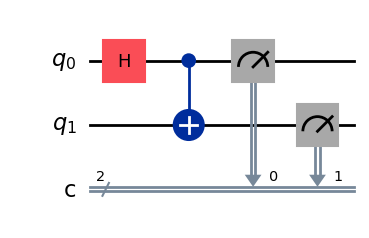

In [30]:
#아래 circuit은 estimator primitive를 위한 것

from qiskit import QuantumCircuit

#bell_circuit = QuantumCircuit(2)
bell_circuit = QuantumCircuit(2, 2) # estimator에서 에러
bell_circuit.h(0)
bell_circuit.cx(0, 1)
bell_circuit.measure([0,1], [0,1]) # estimator에서는 사용않함
bell_circuit.draw(output='mpl')

In [33]:
job = local_simulator.run(bell_circuit, shots=1024)
result = job.result()

In [42]:
result

Result(backend_name='aer_simulator_statevector', backend_version='0.15.1', qobj_id='', job_id='f3a3af53-2959-414d-9c8b-56681f6d2bcb', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x3': 513, '0x0': 511}), header=QobjExperimentHeader(creg_sizes=[['c', 2]], global_phase=0.0, memory_slots=2, n_qubits=2, name='circuit-175', qreg_sizes=[['q', 2]], metadata={}), status=DONE, seed_simulator=2278388177, metadata={'time_taken': 0.002640095, 'num_bind_params': 1, 'parallel_state_update': 2, 'parallel_shots': 1, 'required_memory_mb': 1, 'input_qubit_map': [[1, 1], [0, 0]], 'method': 'statevector', 'device': 'CPU', 'num_qubits': 2, 'sample_measure_time': 0.001196988, 'active_input_qubits': [0, 1], 'num_clbits': 2, 'remapped_qubits': False, 'runtime_parameter_bind': False, 'max_memory_mb': 12978, 'noise': 'ideal', 'measure_sampling': True, 'batched_shots_optimization': False, 'fusion': {'applied': False, 'max_fused_qubits': 5, 'th

In [44]:
result.backend_name

'aer_simulator_statevector'

In [46]:
result.results

[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x3': 513, '0x0': 511}), header=QobjExperimentHeader(creg_sizes=[['c', 2]], global_phase=0.0, memory_slots=2, n_qubits=2, name='circuit-175', qreg_sizes=[['q', 2]], metadata={}), status=DONE, seed_simulator=2278388177, metadata={'time_taken': 0.002640095, 'num_bind_params': 1, 'parallel_state_update': 2, 'parallel_shots': 1, 'required_memory_mb': 1, 'input_qubit_map': [[1, 1], [0, 0]], 'method': 'statevector', 'device': 'CPU', 'num_qubits': 2, 'sample_measure_time': 0.001196988, 'active_input_qubits': [0, 1], 'num_clbits': 2, 'remapped_qubits': False, 'runtime_parameter_bind': False, 'max_memory_mb': 12978, 'noise': 'ideal', 'measure_sampling': True, 'batched_shots_optimization': False, 'fusion': {'applied': False, 'max_fused_qubits': 5, 'threshold': 14, 'enabled': True}}, time_taken=0.002640095)]

In [54]:
result.results[0].data.counts

{'0x3': 513, '0x0': 511}

In [56]:
result.get_counts()

{'11': 513, '00': 511}

In [59]:
result.get_memory

<bound method Result.get_memory of Result(backend_name='aer_simulator_statevector', backend_version='0.15.1', qobj_id='', job_id='f3a3af53-2959-414d-9c8b-56681f6d2bcb', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x3': 513, '0x0': 511}), header=QobjExperimentHeader(creg_sizes=[['c', 2]], global_phase=0.0, memory_slots=2, n_qubits=2, name='circuit-175', qreg_sizes=[['q', 2]], metadata={}), status=DONE, seed_simulator=2278388177, metadata={'time_taken': 0.002640095, 'num_bind_params': 1, 'parallel_state_update': 2, 'parallel_shots': 1, 'required_memory_mb': 1, 'input_qubit_map': [[1, 1], [0, 0]], 'method': 'statevector', 'device': 'CPU', 'num_qubits': 2, 'sample_measure_time': 0.001196988, 'active_input_qubits': [0, 1], 'num_clbits': 2, 'remapped_qubits': False, 'runtime_parameter_bind': False, 'max_memory_mb': 12978, 'noise': 'ideal', 'measure_sampling': True, 'batched_shots_optimization': False, 'fusion': {'applied': False, 'max_fused_qubits': 5, 'threshold': 14, 'enabled': True}}, time_taken=0.002640095)], date=2024-10-16T04:40:02.471331, status=COMPLETED, header=None, metadata={'time_taken_parameter_binding': 4.2633e-05, 'time_taken_execute': 0.00273115, 'omp_enabled': True, 'max_gpu_memory_mb': 0, 'max_memory_mb': 12978, 'parallel_experiments': 1}, time_taken=0.004035234451293945)>

In [64]:
result.get_statevector

<bound method Result.get_statevector of Result(backend_name='aer_simulator_statevector', backend_version='0.15.1', qobj_id='', job_id='f3a3af53-2959-414d-9c8b-56681f6d2bcb', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x3': 513, '0x0': 511}), header=QobjExperimentHeader(creg_sizes=[['c', 2]], global_phase=0.0, memory_slots=2, n_qubits=2, name='circuit-175', qreg_sizes=[['q', 2]], metadata={}), status=DONE, seed_simulator=2278388177, metadata={'time_taken': 0.002640095, 'num_bind_params': 1, 'parallel_state_update': 2, 'parallel_shots': 1, 'required_memory_mb': 1, 'input_qubit_map': [[1, 1], [0, 0]], 'method': 'statevector', 'device': 'CPU', 'num_qubits': 2, 'sample_measure_time': 0.001196988, 'active_input_qubits': [0, 1], 'num_clbits': 2, 'remapped_qubits': False, 'runtime_parameter_bind': False, 'max_memory_mb': 12978, 'noise': 'ideal', 'measure_sampling': True, 'batched_shots_optimization': False, 'fusion': {'applied': False, 'max_fused_qubits': 5, 'threshold': 14, 'enabled': True}}, time_taken=0.002640095)], date=2024-10-16T04:40:02.471331, status=COMPLETED, header=None, metadata={'time_taken_parameter_binding': 4.2633e-05, 'time_taken_execute': 0.00273115, 'omp_enabled': True, 'max_gpu_memory_mb': 0, 'max_memory_mb': 12978, 'parallel_experiments': 1}, time_taken=0.004035234451293945)>

In [65]:
counts = result.get_counts()
print(counts)

{'11': 513, '00': 511}


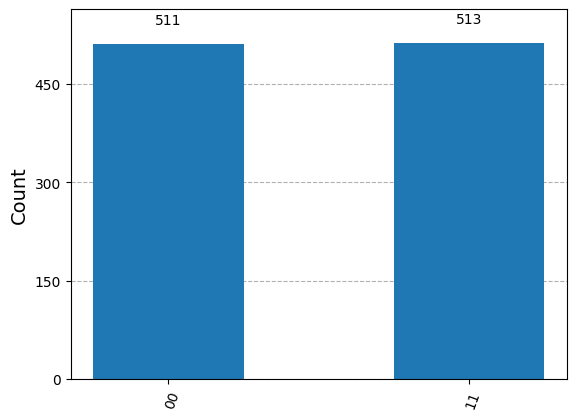

In [66]:
from qiskit.visualization import plot_histogram # Import plot_histogram
plot_histogram(counts)